In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split

In [46]:
df=pd.read_csv('/content/anis/KDDTrain+.txt')

In [47]:
df.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


**Adding column names to the data**

In [48]:
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack','outcome'
])
df.columns=columns

In [49]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,outcome
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [51]:
df.describe(include=['O'])

,protocol_type,service,flag,attack
count,125972,125972,125972,125972
unique,3,70,11,23
top,tcp,http,SF,normal
freq,102688,40338,74944,67342


**Checking for null values**

In [52]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

**Occurences of unique values**

In [53]:
df.nunique()

duration                       2981
protocol_type                     3
service                          70
flag                             11
src_bytes                      3341
dst_bytes                      9326
land                              2
wrong_fragment                    3
urgent                            4
hot                              28
num_failed_logins                 6
logged_in                         2
num_compromised                  88
root_shell                        2
su_attempted                      3
num_root                         82
num_file_creations               35
num_shells                        3
num_access_files                 10
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           512
srv_count                       509
serror_rate                      89
srv_serror_rate                  86
rerror_rate                      82
srv_rerror_rate             

**Encoding the target feature for binary classification**

In [54]:
encoded_df = df.attack.map(lambda x: 0 if x == 'normal' else 1)
df['attack'] = encoded_df

# Visualization

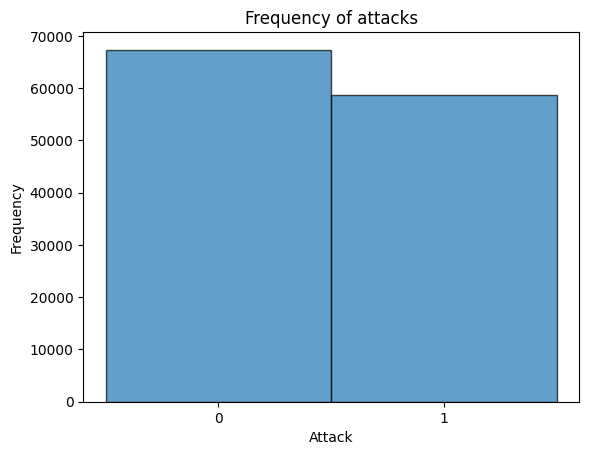

In [55]:
plt.hist(df['attack'], bins=[-0.5, 0.5, 1.5], edgecolor='black', alpha=0.7)
plt.xlabel('Attack')
plt.ylabel('Frequency')
plt.title('Frequency of attacks')
plt.xticks([0, 1])
plt.show()

**Attacks per service**

<Axes: xlabel='count', ylabel='service'>

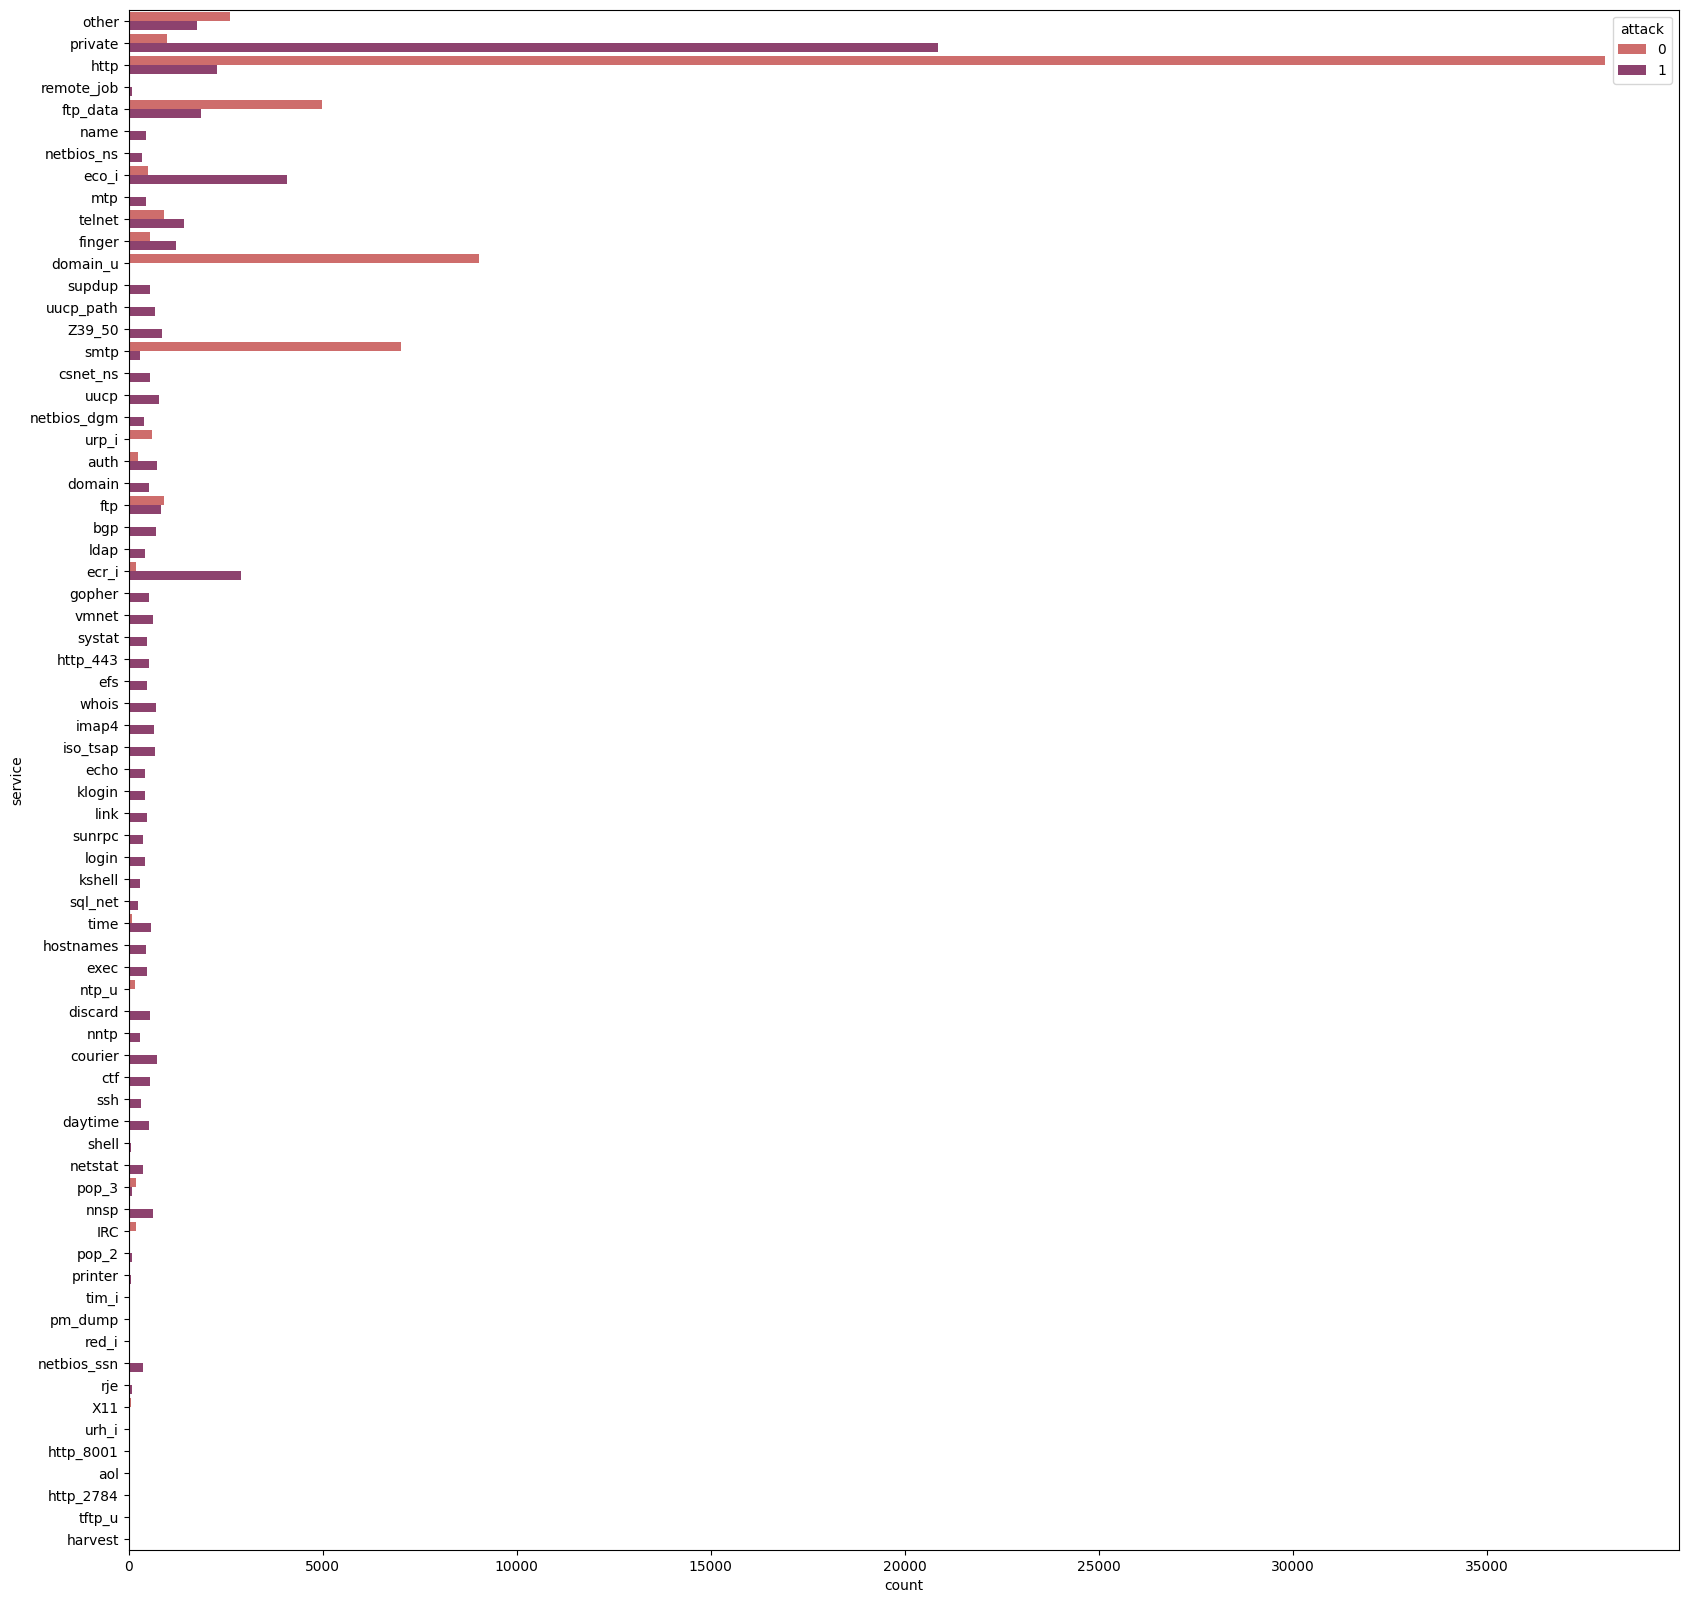

In [56]:
plt.figure(figsize = (20,20))
sns.countplot(data=df, y=df.service, hue = 'attack', palette="flare")

**Attacks per flag**

<Axes: xlabel='count', ylabel='flag'>

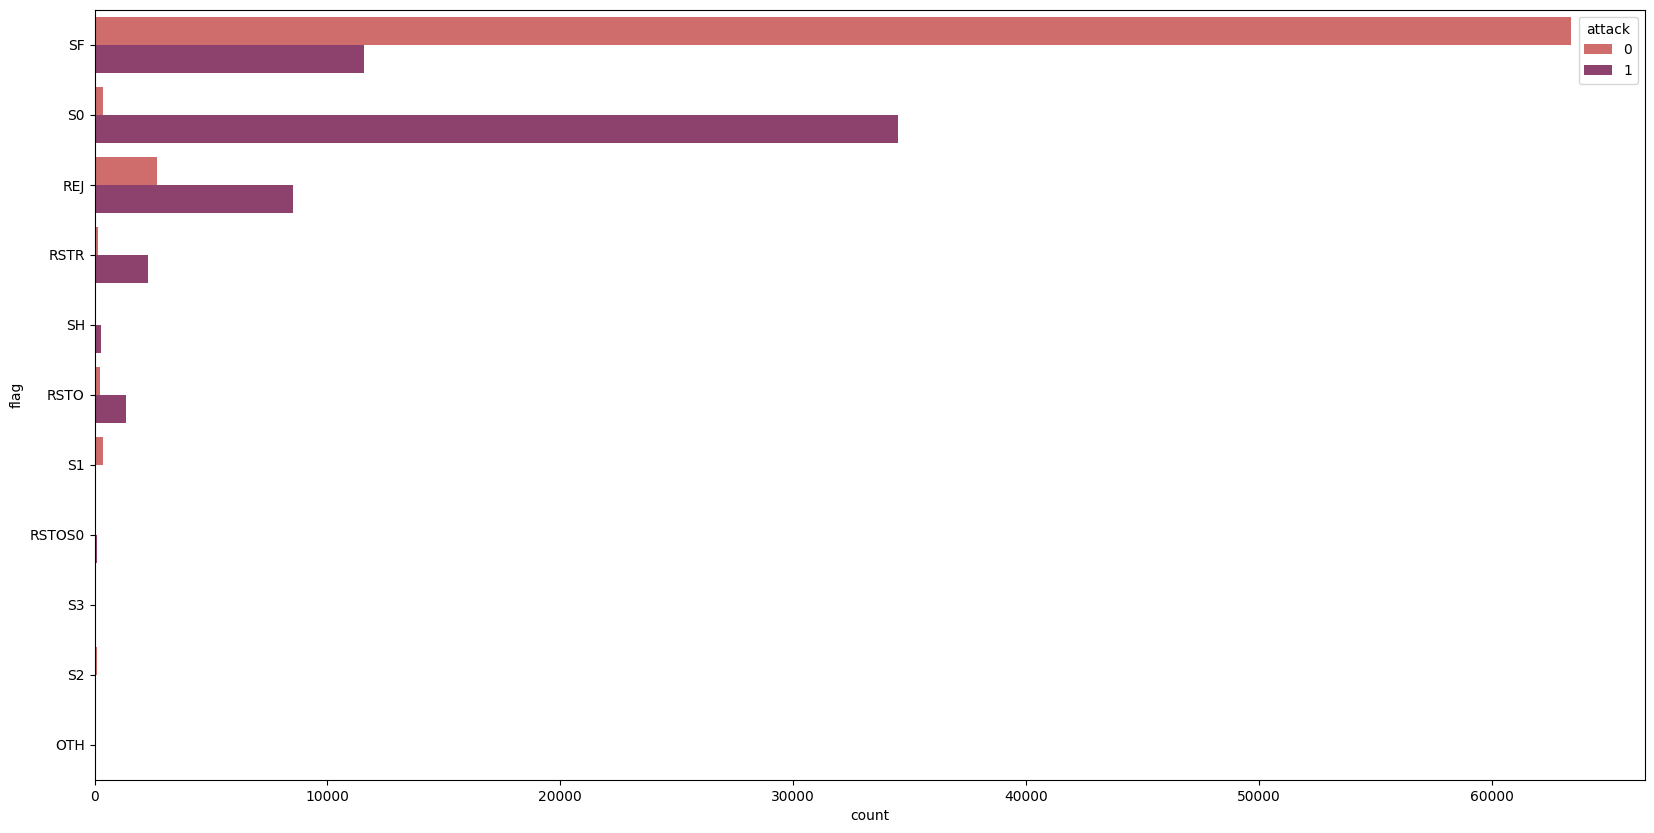

In [57]:
plt.figure(figsize = (20,10))
sns.countplot(data=df, y=df.flag,hue = 'attack', palette="flare")

# Preprocessing

**Encoding catagorical columns**

In [58]:
cols = [col for col in df.select_dtypes(include=['object'])]
for i in cols:
    en = LabelEncoder()
    df[i] = en.fit_transform(df[i])

In [59]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,outcome
0,0,2,44,9,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,0,15
1,0,1,49,5,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,1,19
2,0,1,24,9,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,0,21
3,0,1,24,9,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0,21
4,0,1,49,1,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,1,21


**Visualizing the heatmap of feature correlation**

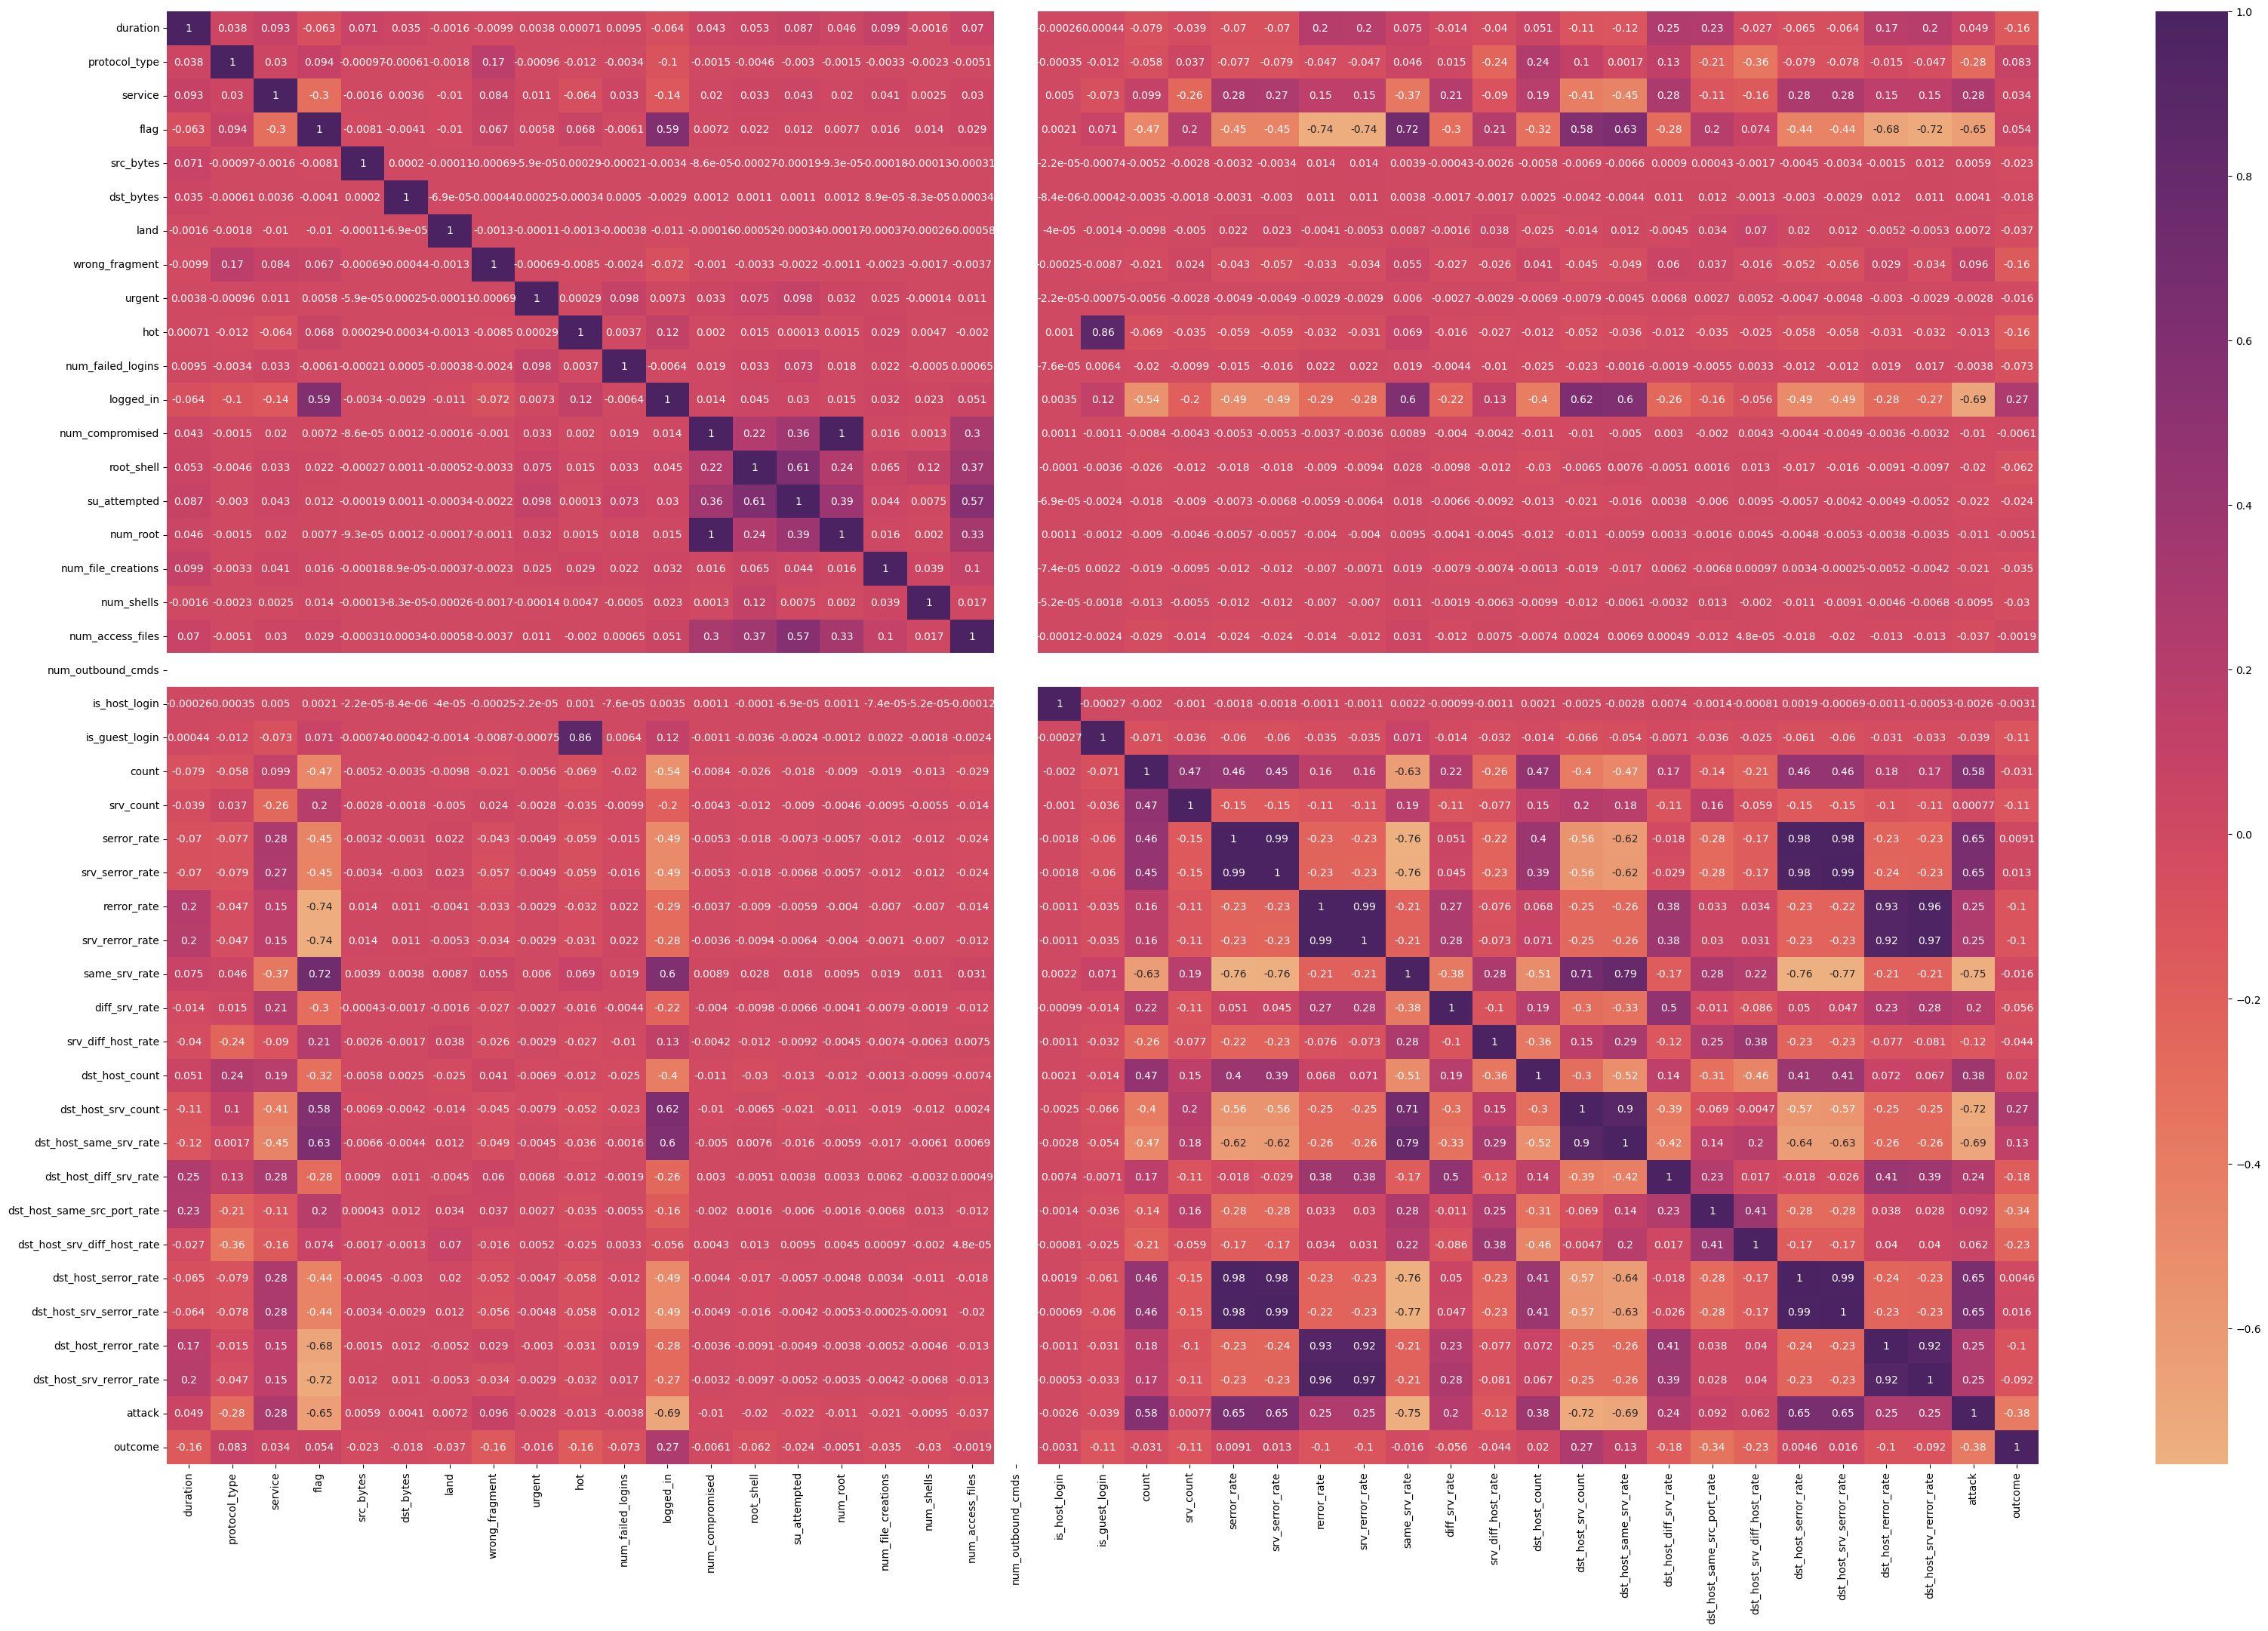

In [60]:
plt.figure(figsize=(40,25))
sns.heatmap(df.corr(),annot= True,cmap = 'flare')
plt.show()

**Correlation matrix**

In [61]:
corr_m=df.corr().abs()
corr_m

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,outcome
duration,1.000000,0.038241,0.092857,0.063389,0.070737,0.034878,0.001553,0.009866,0.003830,0.000705,...,0.116006,0.254195,0.228737,0.026670,0.064949,0.064361,0.173815,0.199023,0.048785,0.156310
protocol_type,0.038241,1.000000,0.029993,0.093669,0.000974,0.000608,0.001757,0.169534,0.000965,0.011857,...,0.001701,0.131380,0.209105,0.356183,0.079399,0.077926,0.015435,0.046938,0.281357,0.082775
service,0.092857,0.029993,1.000000,0.304011,0.001631,0.003596,0.009952,0.084404,0.010980,0.064067,...,0.452702,0.284071,0.111163,0.156213,0.281632,0.277592,0.150666,0.148403,0.276545,0.033725
flag,0.063389,0.093669,0.304011,1.000000,0.008114,0.004096,0.010373,0.067215,0.005811,0.068438,...,0.630126,0.283606,0.195689,0.073775,0.443438,0.443223,0.683310,0.718778,0.647071,0.054177
src_bytes,0.070737,0.000974,0.001631,0.008114,1.000000,0.000204,0.000109,0.000693,0.000059,0.000295,...,0.006572,0.000900,0.000431,0.001655,0.004503,0.003397,0.001468,0.012449,0.005921,0.022592
dst_bytes,0.034878,0.000608,0.003596,0.004096,0.000204,1.000000,0.000069,0.000440,0.000248,0.000344,...,0.004424,0.011031,0.011747,0.001281,0.003024,0.002944,0.011729,0.011223,0.004118,0.018076
land,0.001553,0.001757,0.009952,0.010373,0.000109,0.000069,1.000000,0.001261,0.000109,0.001340,...,0.011597,0.004516,0.033851,0.070474,0.019840,0.012276,0.005222,0.005303,0.007191,0.037038
wrong_fragment,0.009866,0.169534,0.084404,0.067215,0.000693,0.000440,0.001261,1.000000,0.000692,0.008508,...,0.048734,0.059796,0.037177,0.016252,0.051917,0.055918,0.028890,0.033682,0.095905,0.157130
urgent,0.003830,0.000965,0.010980,0.005811,0.000059,0.000248,0.000109,0.000692,1.000000,0.000293,...,0.004489,0.006840,0.002741,0.005176,0.004749,0.004834,0.002999,0.002912,0.002787,0.016411
hot,0.000705,0.011857,0.064067,0.068438,0.000295,0.000344,0.001340,0.008508,0.000293,1.000000,...,0.036294,0.012293,0.034536,0.024715,0.058223,0.058215,0.030555,0.031670,0.013084,0.160013


**Finding features with correlation > 0.95 and dropping them.**

In [62]:
#creating a mask for the upper triangle of the correlation matrix
upper_triangle_mask = np.triu(np.ones_like(corr_m, dtype=bool), k=1)
#selecting the upper triangle elements using the mask
upper_triangle_values = corr_m.where(upper_triangle_mask)
#finding the features to drop
to_drop = [column for column in upper_triangle_values.columns if any(upper_triangle_values[column] > 0.95)]
print(to_drop)

['num_root', 'srv_serror_rate', 'srv_rerror_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_srv_rerror_rate']


In [63]:
df=df.drop(columns=to_drop)

**Splitting data to test & train**

In [67]:
X_train=df.drop(['attack'] , axis = 1).values
Y_train=df['attack'].values

In [68]:
X=df.drop(['attack'], axis=1)
Y=df['attack'].copy()

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=40)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(88180, 36)
(88180,)
(37792, 36)
(37792,)


**Data scaling**

In [69]:

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# SVM(support vector machines)

**Linear kernel**

Training

In [70]:
linear_svm=svm.SVC(kernel='linear')
linear_svm.fit(x_train,y_train)
test_predictions=linear_svm.predict(x_test)
train_predictions= linear_svm.predict(x_train)

**Model accuracy**

Train data prediction:

In [26]:
print("Accuracy:",metrics.accuracy_score(y_train,train_predictions))

Accuracy: 0.9797346337037877


Test data prediction:

In [27]:
print('Accuracy:',metrics.accuracy_score(y_test,test_predictions))

Accuracy: 0.9785668924640135


**Polynomial kernel**

Training

In [35]:
P_svm=svm.SVC(kernel='poly',degree=3)
P_svm.fit(x_train,y_train)
train_pol_predictions=P_svm.predict(x_train)
test_pol_predictions=P_svm.predict(x_test)

**Model accuracy**

Train data prediction:

In [71]:
print('Accuracy:',metrics.accuracy_score(y_train,train_pol_predictions))

Accuracy: 0.99718757087775


Test data prediction:

In [72]:
print('Accuracy:',metrics.accuracy_score(y_test,test_pol_predictions))

Accuracy: 0.9966130397967824


**RBF kernel**

Training

In [73]:
RBF_svm=svm.SVC(kernel='rbf')
RBF_svm.fit(x_train,y_train)
train_rbf_predictions=RBF_svm.predict(x_train)
test_rbf_predictions=RBF_svm.predict(x_test)

**Model accuracy**

Train data prediction

In [39]:
print('Accuracy:',metrics.accuracy_score(y_train,train_rbf_predictions))

Accuracy: 0.9972215921977773


Test data prediction

In [40]:
print('Accuracy:',metrics.accuracy_score(y_test,test_rbf_predictions))

Accuracy: 0.99663950042337


**Sigmoid Kernel**

Training

In [41]:
SIG_svm=svm.SVC(kernel='sigmoid')
SIG_svm.fit(x_train,y_train)
train_sig_predictions=SIG_svm.predict(x_train)
test_sig_predictions=SIG_svm.predict(x_test)

**Model accuracy**

Training data accuracy:

In [42]:
print('Accuracy:',metrics.accuracy_score(y_train,train_sig_predictions))

Accuracy: 0.8913585847130868


Test data accuracy:

In [44]:
print('Accuracy:',metrics.accuracy_score(y_test,test_sig_predictions))

Accuracy: 0.8903207027942421


# Conclusion

Polynomial and RBF kernels are best suited for classifying network activity with an SVM.